In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve, auc
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression

PARTNER 1 - MICHAEL JOSEPH

In [2]:
# create a datafraame by combining the training set values and its true labels
data_labels=pd.read_csv('training_set_values.csv')
data_values=pd.read_csv('training_set_labels.csv')
data = data_values.merge(data_labels, on='id')

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

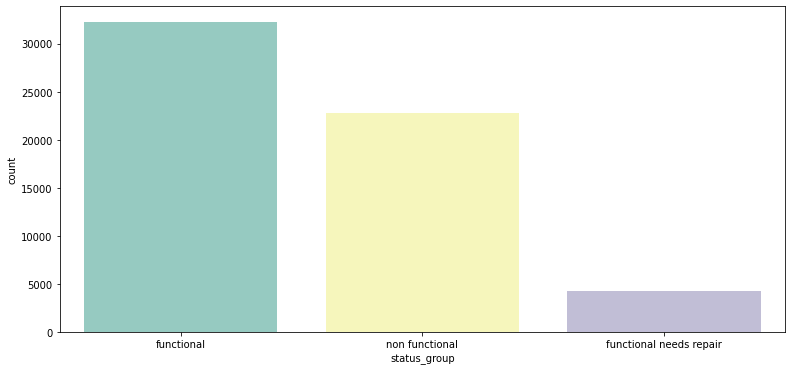

In [3]:
# visualizing the distribution of the target variables in the training dataset
plt.figure(figsize=(13,6))
sns.countplot(data=data, x="status_group", palette="Set3")
data.status_group.value_counts()

In [4]:
# checks for null values in the dataset, 
# replaces certain 0.0 values with NaN,
data.isnull().sum()
data.population.min()
data['gps_height'].replace(0.0, np.nan, inplace=True)
data['population'].replace(0.0, np.nan, inplace=True)
data['amount_tsh'].replace(0.0, np.nan, inplace=True)


In [5]:
# This code groups the data by 'region' and 'permit', 
# and then returns the count of observations for each group
data.groupby(['region','permit']).size() 

region         permit
Arusha         False      255
               True      2650
Dar es Salaam  False      777
Dodoma         False     1212
               True       989
Iringa         False     2117
               True      3174
Kagera         False      795
               True      2521
Kigoma         False     1160
               True      1656
Kilimanjaro    False      445
               True      3796
Lindi          False      733
               True       813
Manyara        False       77
               True      1506
Mara           False      604
               True       998
Mbeya          False     1399
               True      2134
Morogoro       False       39
               True      3967
Mtwara         False      419
               True      1311
Mwanza         False      127
               True      2975
Pwani          False     1105
               True      1530
Rukwa          False      646
               True      1162
Ruvuma         False      840
               Tru

In [6]:
# This code fills missing values in the 'gps_height', 'population', and 'amount_tsh' 
# columns by using the mean or median value of the corresponding group defined by region, 
# district_code, or the entire dataset if necessary. The 'isnull()' function is 
# then used to check if there are any remaining missing values in the dataset.
data["gps_height"].fillna(data.groupby(['region', 'district_code'])["gps_height"].transform("mean"), inplace=True)
data["gps_height"].fillna(data.groupby(['region'])["gps_height"].transform("mean"), inplace=True)
data["gps_height"].fillna(data["gps_height"].mean(), inplace=True)
data["population"].fillna(data.groupby(['region', 'district_code'])["population"].transform("median"), inplace=True)
data["population"].fillna(data.groupby(['region'])["population"].transform("median"), inplace=True)
data["population"].fillna(data["population"].median(), inplace=True)
data["amount_tsh"].fillna(data.groupby(['region', 'district_code'])["amount_tsh"].transform("median"), inplace=True)
data["amount_tsh"].fillna(data.groupby(['region'])["amount_tsh"].transform("median"), inplace=True)
data["amount_tsh"].fillna(data["amount_tsh"].median(), inplace=True)

In [7]:
# Normalize the 'amount_tsh', 'gps_height', and 'population' 
# features of the 'data' using MinMaxScaler, with a 
# feature range of 0 to 20, and display the first 20 rows of the transformed data. 
features=['amount_tsh', 'gps_height', 'population']
scaler = MinMaxScaler(feature_range=(0,20))
data[features] = scaler.fit_transform(data[features])

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

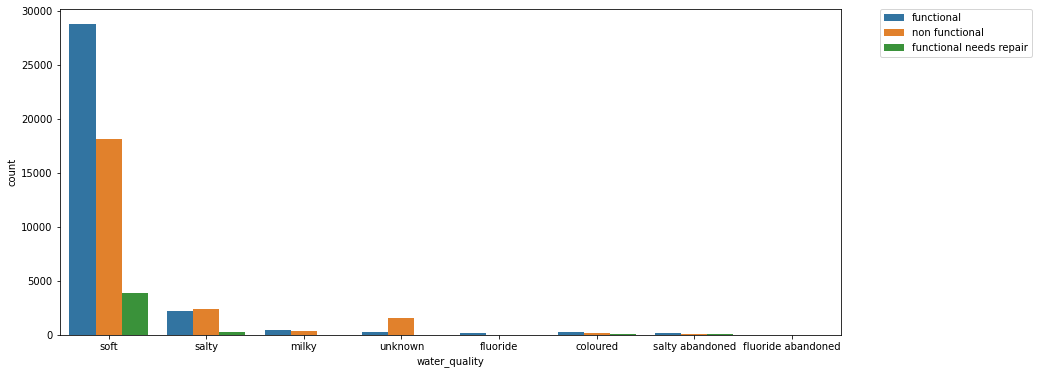

In [8]:
# Plot a countplot of the 'water_quality' column against 'status_group' column and 
# display the value counts of 'water_quality' column in a DataFrame.
plt.figure(figsize=(14,6))
sns.countplot(data=data,x='water_quality',hue='status_group')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
data.water_quality.value_counts()

<AxesSubplot:xlabel='region', ylabel='count'>

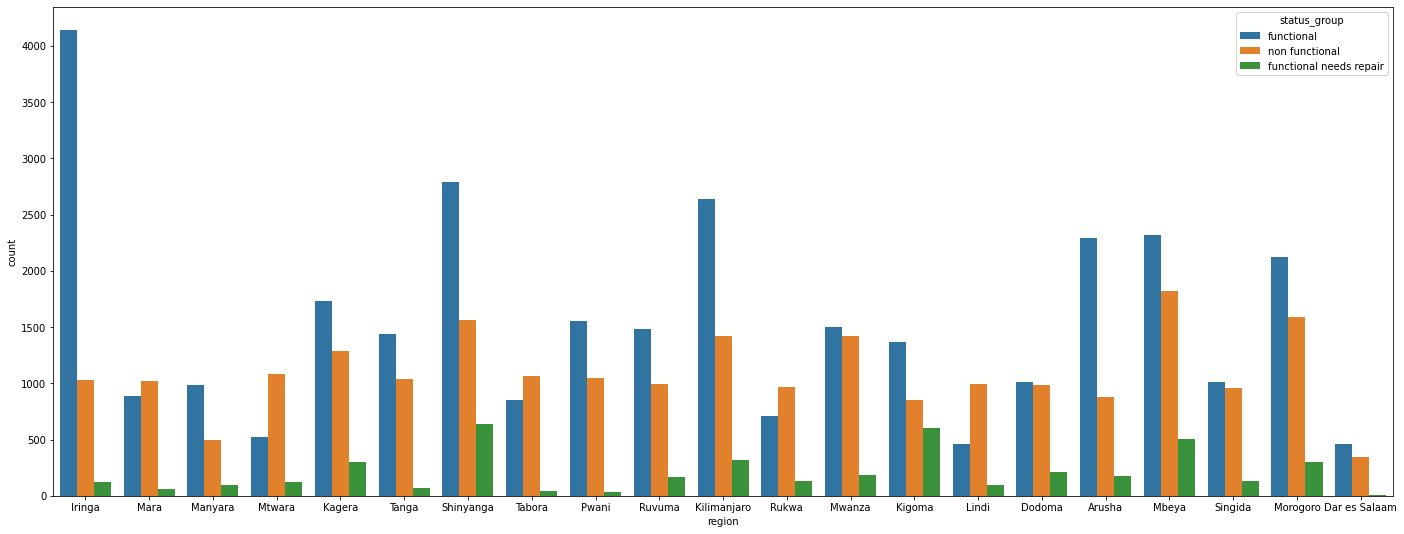

In [9]:
#looking at regions and the target variable distributions in each distribution
plt.figure(figsize=(24, 9))

sns.countplot(data=data,x='region',hue='status_group')

<AxesSubplot:xlabel='public_meeting', ylabel='count'>

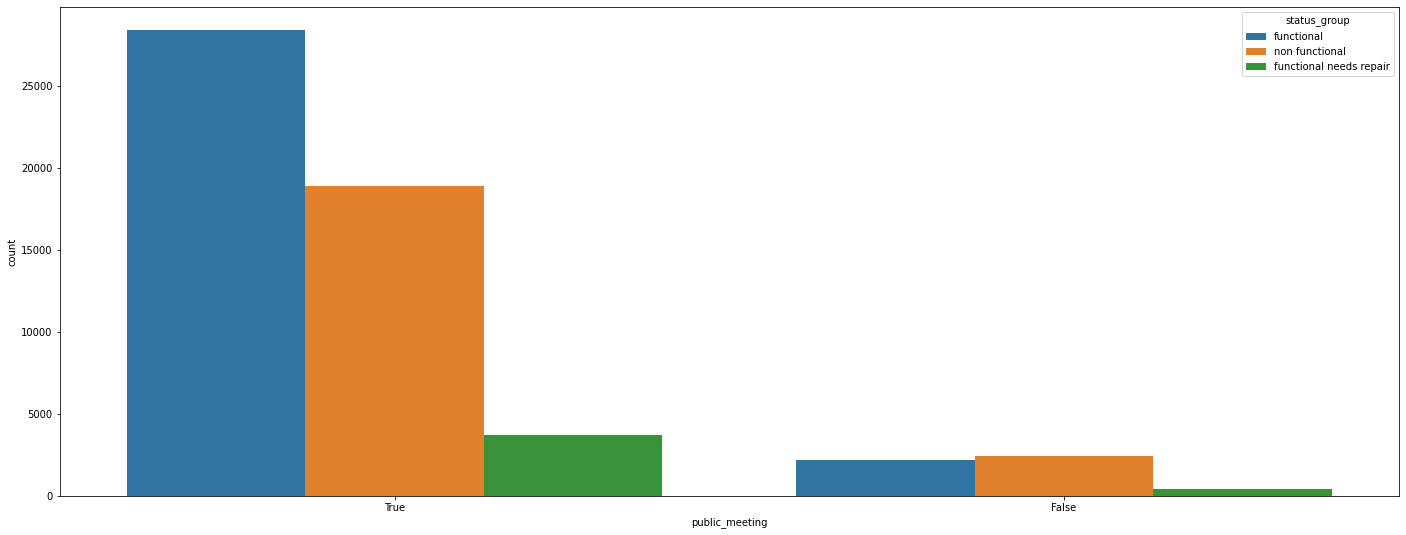

In [10]:
# This code creates a bar plot showing the count of status_group based on public_meeting

plt.figure(figsize=(24, 9))

sns.countplot(data=data,x='public_meeting',hue='status_group')

c:\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


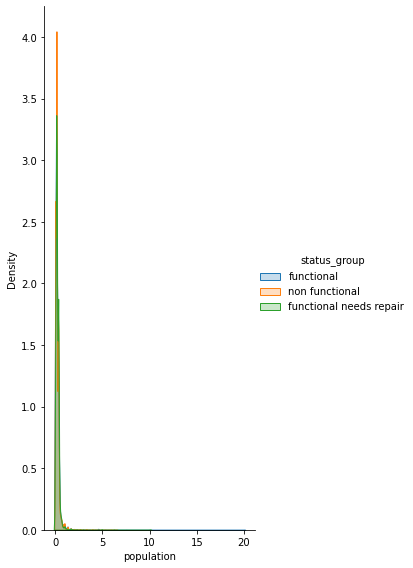

In [11]:
# show a plot that shows the density of a target class on a certain value of the feature below
sns.FacetGrid(data, hue='status_group', height=8,aspect=0.5).map(sns.kdeplot, 'population', shade=True).add_legend()

c:\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


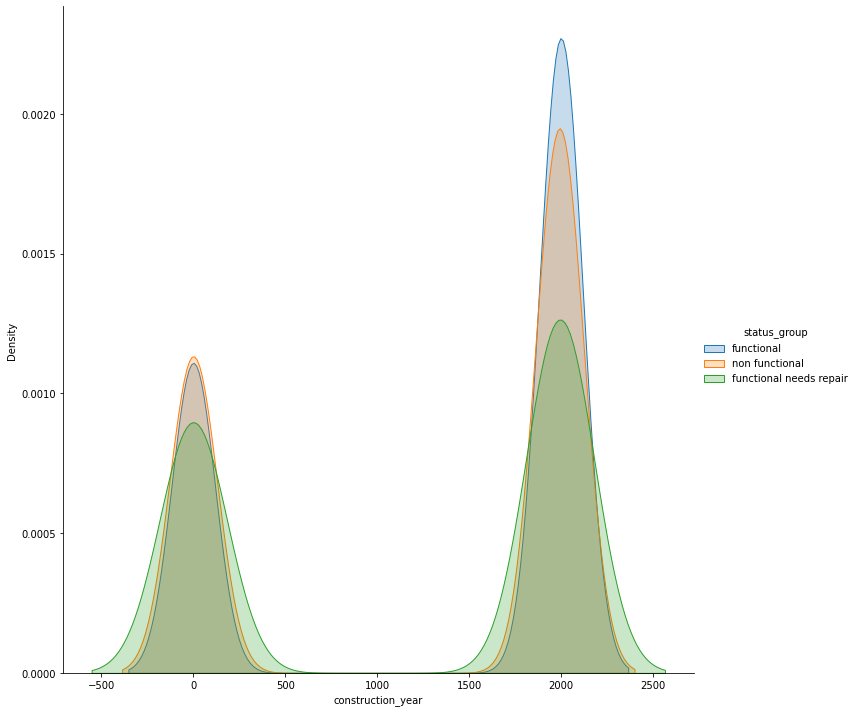

In [12]:
# show a plot that shows the density of a target class on a certain value of the feature below
(sns.FacetGrid(data, hue='status_group',height=10).map(sns.kdeplot, 'construction_year', shade=True).add_legend())

c:\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


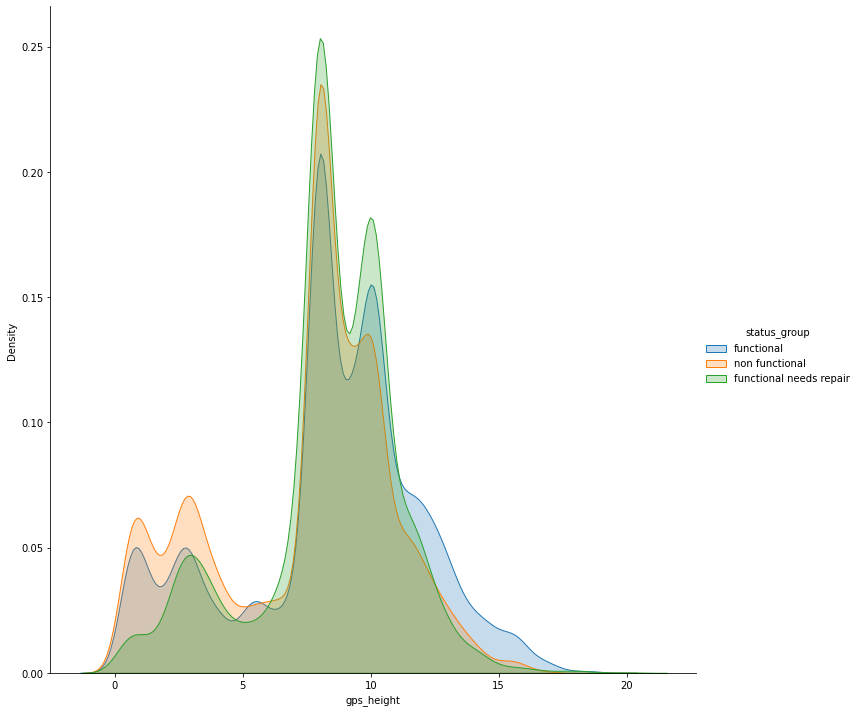

In [13]:
# show a plot that shows the density of a target class on a certain value of the feature below
(sns.FacetGrid(data, hue='status_group', height=10).map(sns.kdeplot, 'gps_height', shade=True).add_legend())

c:\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


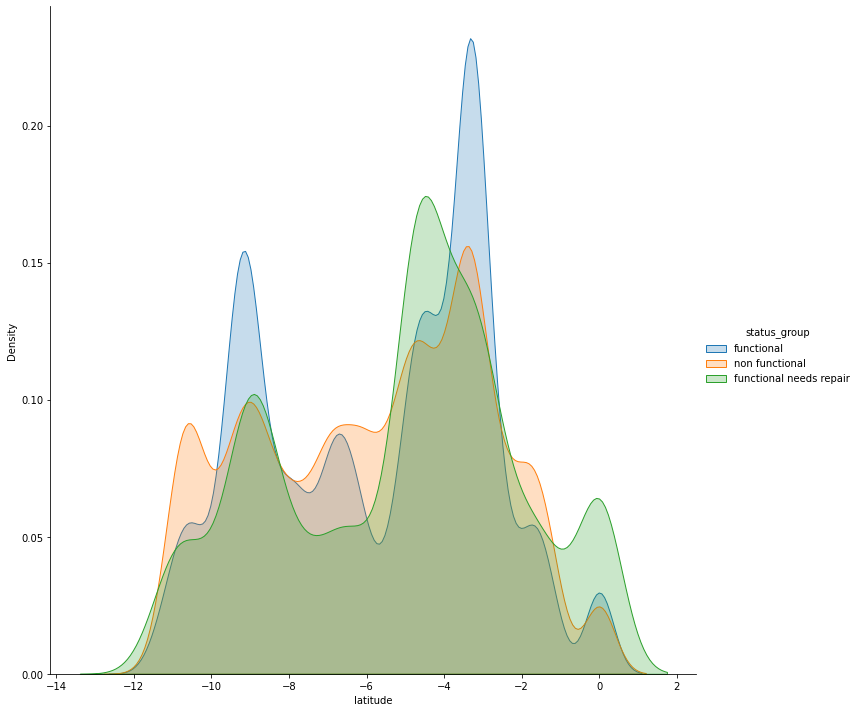

In [14]:
# show a plot that shows the density of a target class on a certain value of the feature below

(sns
  .FacetGrid(data, 
             hue='status_group',height=10)
  .map(sns.kdeplot, 'latitude', shade=True)
 .add_legend()
)

c:\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


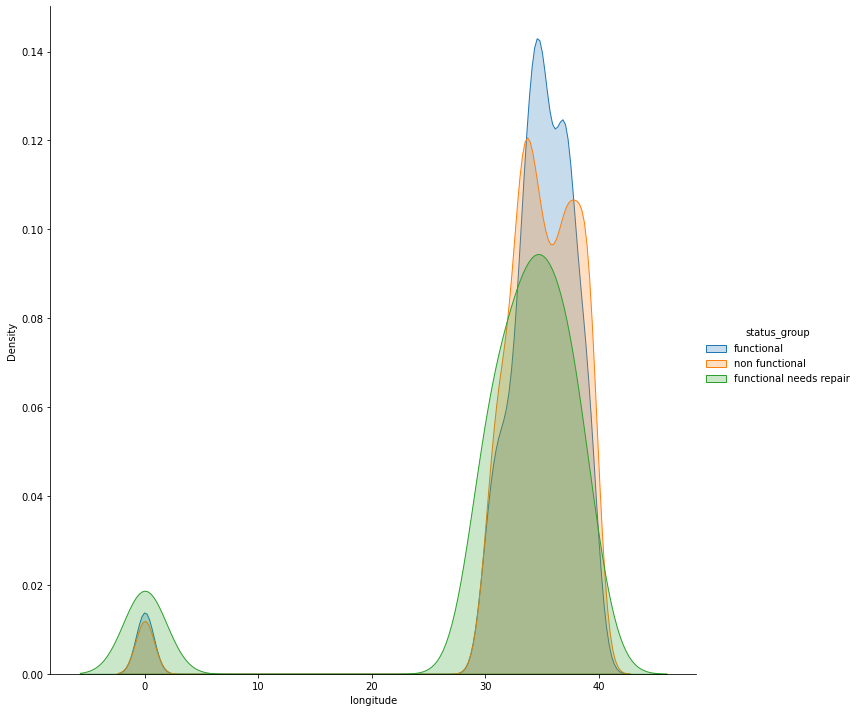

In [15]:
# show a plot that shows the density of a target class on a certain value of the feature below

(sns
  .FacetGrid(data, 
             hue='status_group',height=10)
  .map(sns.kdeplot, 'longitude', shade=True)
 .add_legend()
)

c:\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


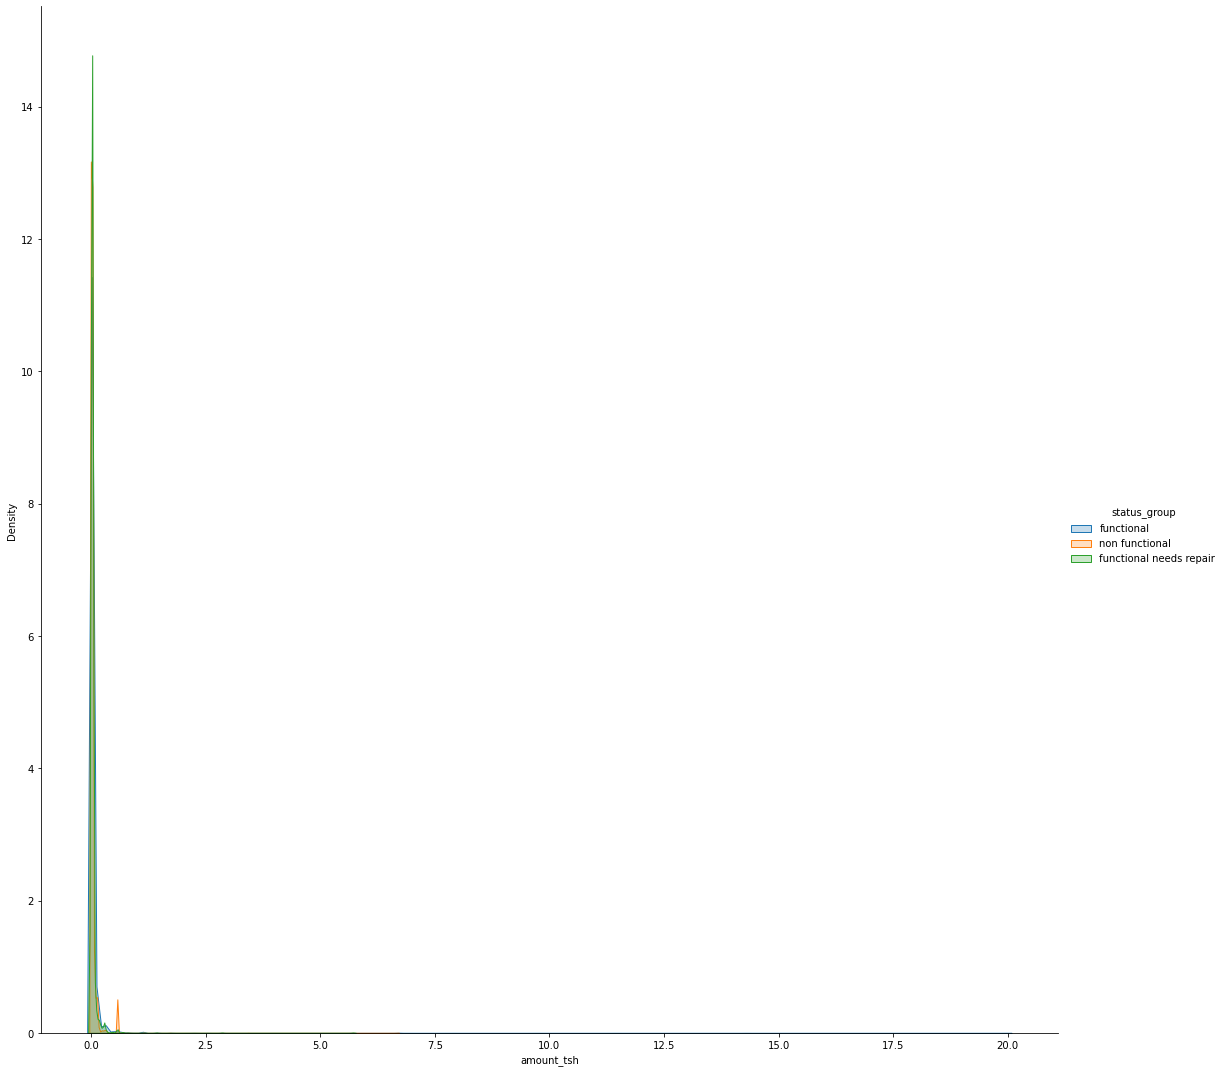

In [16]:
# show a plot that shows the density of a target class on a certain value of the feature below
(sns
  .FacetGrid(data, 
             hue='status_group',height=15)
  .map(sns.kdeplot, 'amount_tsh', shade=True)
 .add_legend()
)

<AxesSubplot:xlabel='source_type', ylabel='count'>

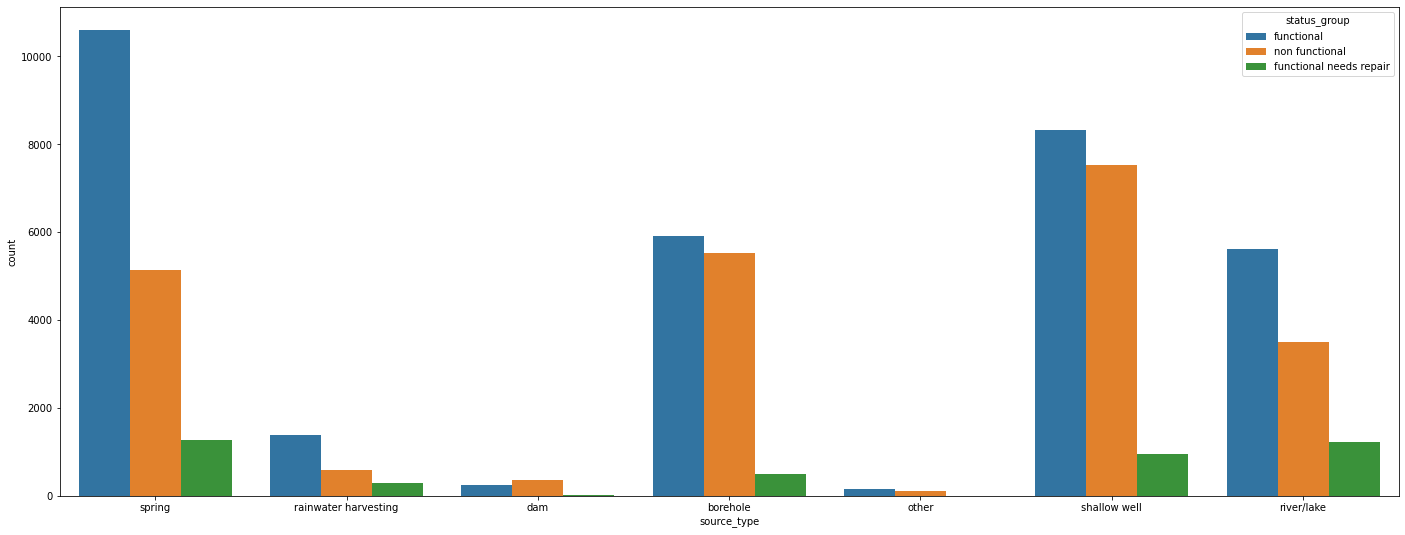

In [17]:
plt.figure(figsize=(24, 9))
sns.countplot(data=data,x='source_type',hue='status_group')

<AxesSubplot:xlabel='extraction_type_group', ylabel='count'>

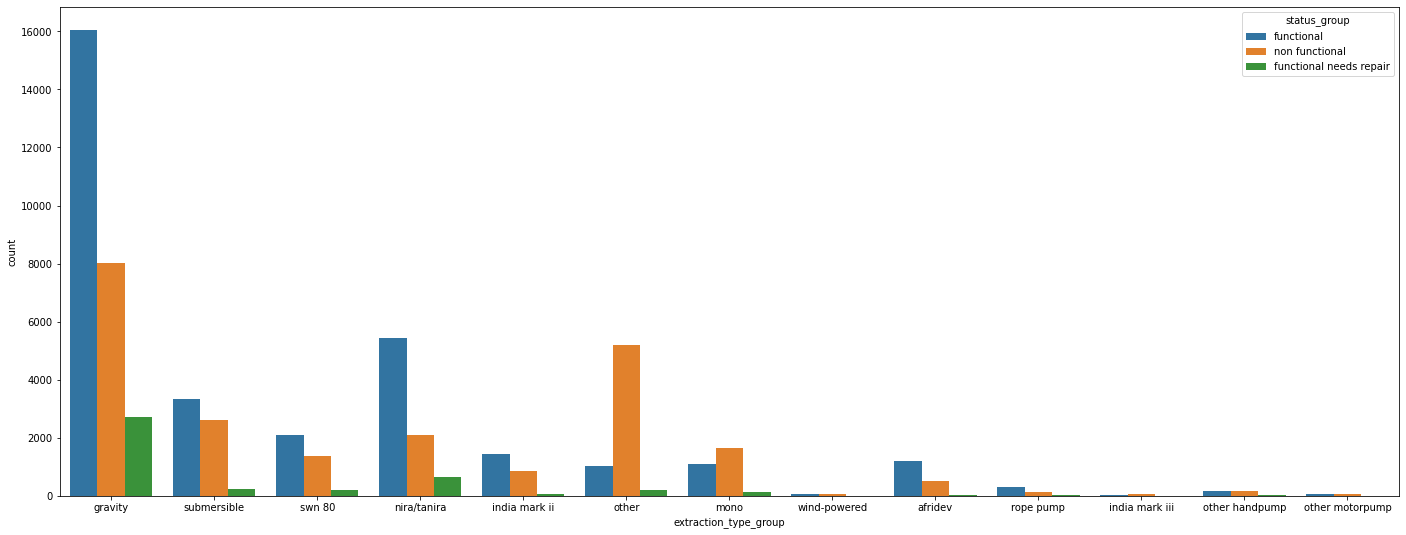

In [18]:
plt.figure(figsize=(24, 9))
sns.countplot(data=data,x='extraction_type_group',hue='status_group')

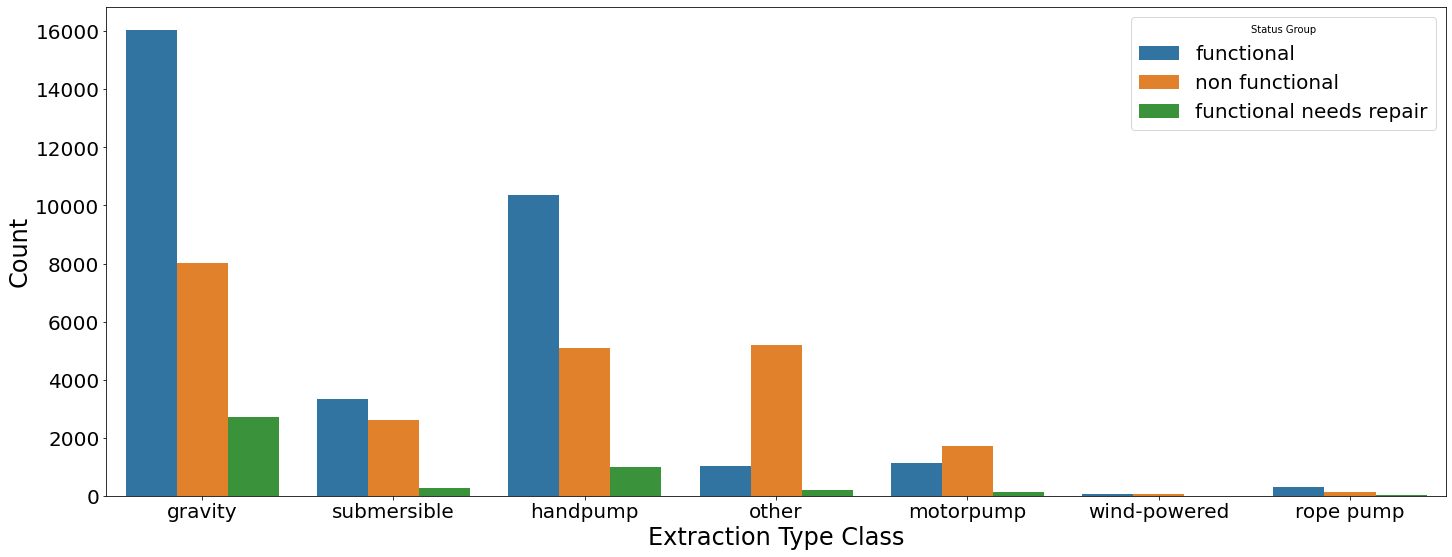

In [19]:
plt.figure(figsize=(24, 9))

sns.countplot(data=data,x='extraction_type_class',hue='status_group')
plt.xlabel('Extraction Type Class', fontsize=24)
plt.ylabel('Count', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20, title='Status Group')

<AxesSubplot:xlabel='waterpoint_type', ylabel='count'>

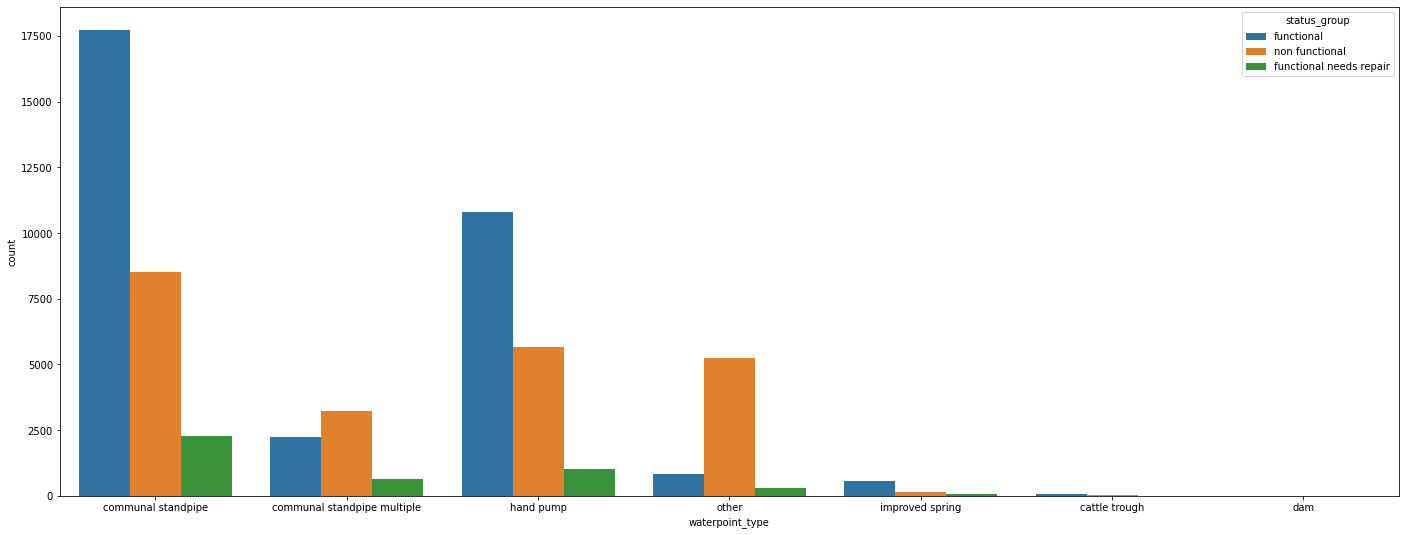

In [20]:
plt.figure(figsize=(24, 9))
sns.countplot(data=data,x='waterpoint_type',hue='status_group')

<AxesSubplot:xlabel='quantity', ylabel='count'>

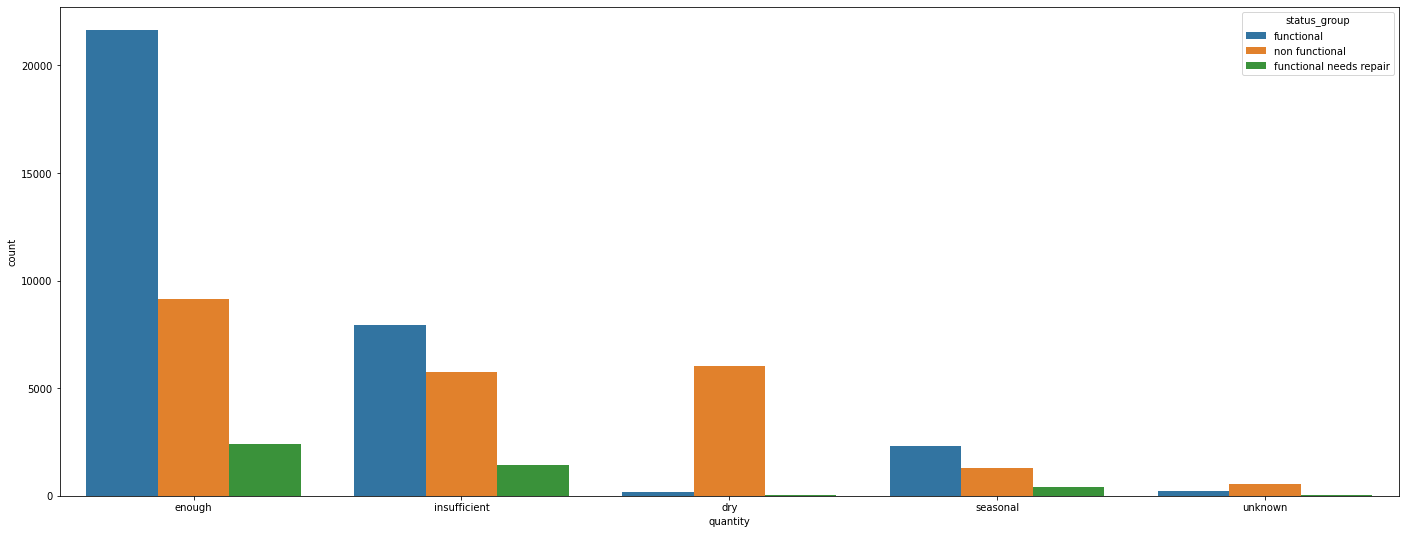

In [21]:
plt.figure(figsize=(24, 9))

sns.countplot(data=data,x='quantity',hue='status_group')

In [22]:
data['longitude'].replace(0.0, np.nan, inplace=True)
data['latitude'].replace(0.0, np.nan, inplace=True)
data['construction_year'].replace(0.0, np.nan, inplace=True)

data["latitude"].fillna(data.groupby(['region', 'district_code'])["latitude"].transform("mean"), inplace=True)
data["longitude"].fillna(data.groupby(['region', 'district_code'])["longitude"].transform("mean"), inplace=True)
data["longitude"].fillna(data.groupby(['region'])["longitude"].transform("mean"), inplace=True)
data["construction_year"].fillna(data.groupby(['region', 'district_code'])["construction_year"].transform("median"), inplace=True)
data["construction_year"].fillna(data.groupby(['region'])["construction_year"].transform("median"), inplace=True)
data["construction_year"].fillna(data.groupby(['district_code'])["construction_year"].transform("median"), inplace=True)
data["construction_year"].fillna(data["construction_year"].median(), inplace=True)

#make operational year column by date-recorded - construction year
data['date_recorded'] = pd.to_datetime(data['date_recorded'])
data['operational_year'] = data.date_recorded.dt.year - data.construction_year

c:\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


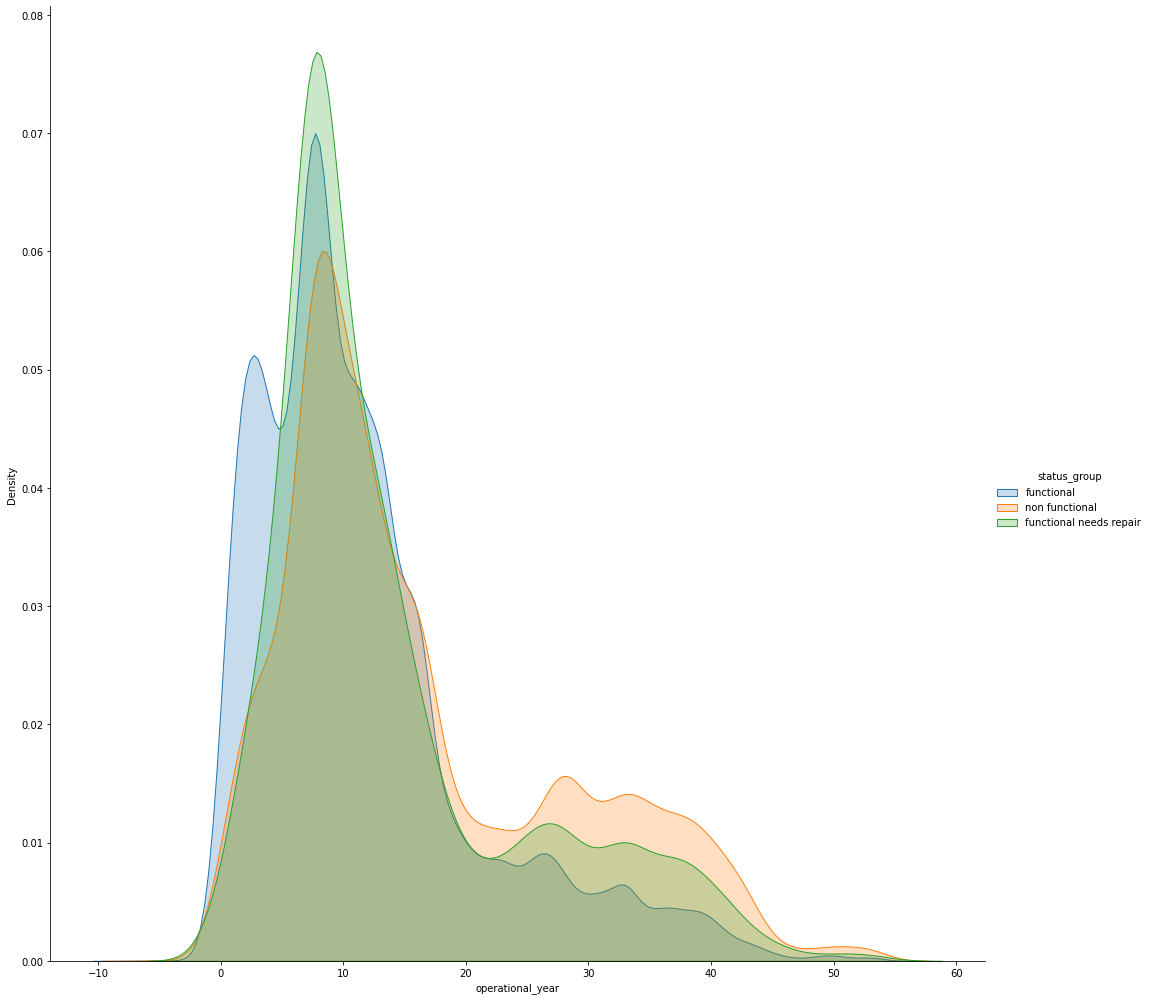

In [23]:
(sns
  .FacetGrid(data, 
             hue='status_group',height=14)
  .map(sns.kdeplot, 'operational_year', shade=True)
 .add_legend()
)

<AxesSubplot:xlabel='payment_type', ylabel='count'>

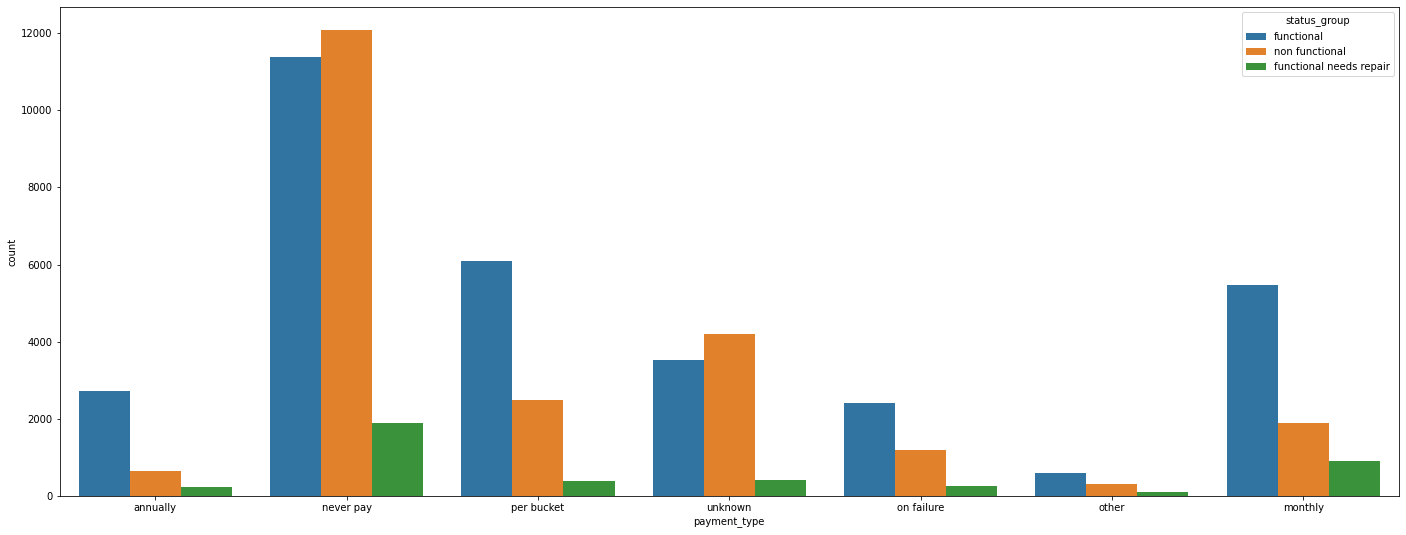

In [24]:
plt.figure(figsize=(24, 9))
sns.countplot(data=data,x='payment_type',hue='status_group')

In [25]:
#DATA Cleaning
waste_features=['wpt_name','num_private','subvillage','region_code','recorded_by']
#since region and region_code are representing the same thing
data.drop(waste_features,axis=1,inplace=True)
data.drop('management_group',axis=1,inplace=True) 
data.drop('extraction_type_group',axis=1,inplace=True)
data.drop('extraction_type_class',axis=1,inplace=True)
data.drop('scheme_name',axis=1,inplace=True)
data.drop('payment',axis=1,inplace=True)
data.drop('quality_group',axis=1,inplace=True)
data.drop('source_type',axis=1,inplace=True)
data.drop('source_class',axis=1,inplace=True)
data.drop('waterpoint_type_group',axis=1,inplace=True)
data.drop('ward',axis=1,inplace=True)
data.drop('public_meeting', axis=1, inplace=True)
data.drop('permit', axis=1, inplace=True)

#For every categorical response, convert the levels to lower case, in case there is random capitalization
data.waterpoint_type = data.waterpoint_type.str.lower()
data.funder = data.funder.str.lower()
data.basin = data.basin.str.lower()
data.region = data.region.str.lower()
data.source = data.source.str.lower()
data.lga = data.lga.str.lower()
data.management = data.management.str.lower()
data.quantity = data.quantity.str.lower()
data.water_quality = data.water_quality.str.lower()
data.payment_type=data.payment_type.str.lower()
data.extraction_type=data.extraction_type.str.lower()

data["funder"].fillna("other", inplace=True)
data["scheme_management"].fillna("other", inplace=True)
data["installer"].fillna("other", inplace=True)
data.drop('date_recorded', axis=1, inplace=True)
data.drop('construction_year', axis=1, inplace=True)
data.to_csv("clean.csv")

PARTNER 1 - TEST CLEAN 

In [26]:
data=pd.read_csv('test_set_values.csv')

data['gps_height'].replace(0.0, np.nan, inplace=True)
data['population'].replace(0.0, np.nan, inplace=True)
data['amount_tsh'].replace(0.0, np.nan, inplace=True)

data["gps_height"].fillna(data.groupby(['region', 'district_code'])["gps_height"].transform("mean"), inplace=True)
data["gps_height"].fillna(data.groupby(['region'])["gps_height"].transform("mean"), inplace=True)
data["gps_height"].fillna(data["gps_height"].mean(), inplace=True)
data["population"].fillna(data.groupby(['region', 'district_code'])["population"].transform("median"), inplace=True)
data["population"].fillna(data.groupby(['region'])["population"].transform("median"), inplace=True)
data["population"].fillna(data["population"].median(), inplace=True)
data["amount_tsh"].fillna(data.groupby(['region', 'district_code'])["amount_tsh"].transform("median"), inplace=True)
data["amount_tsh"].fillna(data.groupby(['region'])["amount_tsh"].transform("median"), inplace=True)
data["amount_tsh"].fillna(data["amount_tsh"].median(), inplace=True)

features=['amount_tsh', 'gps_height', 'population']
scaler = MinMaxScaler(feature_range=(0,20))
data[features] = scaler.fit_transform(data[features])

data['longitude'].replace(0.0, np.nan, inplace=True)
data['latitude'].replace(0.0, np.nan, inplace=True)
data['construction_year'].replace(0.0, np.nan, inplace=True)

data["latitude"].fillna(data.groupby(['region', 'district_code'])["latitude"].transform("mean"), inplace=True)
data["longitude"].fillna(data.groupby(['region', 'district_code'])["longitude"].transform("mean"), inplace=True)
data["longitude"].fillna(data.groupby(['region'])["longitude"].transform("mean"), inplace=True)
data["construction_year"].fillna(data.groupby(['region', 'district_code'])["construction_year"].transform("median"), inplace=True)
data["construction_year"].fillna(data.groupby(['region'])["construction_year"].transform("median"), inplace=True)
data["construction_year"].fillna(data.groupby(['district_code'])["construction_year"].transform("median"), inplace=True)
data["construction_year"].fillna(data["construction_year"].median(), inplace=True)


data['date_recorded'] = pd.to_datetime(data['date_recorded'])
data['operational_year'] = data.date_recorded.dt.year - data.construction_year


In [27]:
#DATA Cleaning
waste_features=['wpt_name','num_private','subvillage','region_code','recorded_by']
#since region and region_code are representing the same thing
data.drop(waste_features,axis=1,inplace=True)
data.drop('management_group',axis=1,inplace=True)
data.drop('extraction_type_group',axis=1,inplace=True)
data.drop('extraction_type_class',axis=1,inplace=True)
data.drop('scheme_name',axis=1,inplace=True)
data.drop('payment',axis=1,inplace=True)
data.drop('quality_group',axis=1,inplace=True)
data.drop('quantity_group',axis=1,inplace=True)
data.drop('source_type',axis=1,inplace=True)
data.drop('source_class',axis=1,inplace=True)
data.drop('waterpoint_type_group',axis=1,inplace=True)
data.drop('ward',axis=1,inplace=True)
data.drop('public_meeting', axis=1, inplace=True)
data.drop('permit', axis=1, inplace=True)

In [28]:
#For every categorical response, convert the levels to lower case, in case there is random capitalization
data.waterpoint_type = data.waterpoint_type.str.lower()
data.funder = data.funder.str.lower()
data.basin = data.basin.str.lower()
data.region = data.region.str.lower()
data.source = data.source.str.lower()
data.lga = data.lga.str.lower()
data.management = data.management.str.lower()
data.quantity = data.quantity.str.lower()
data.water_quality = data.water_quality.str.lower()
data.payment_type=data.payment_type.str.lower()
data.extraction_type=data.extraction_type.str.lower()

data["funder"].fillna("other", inplace=True)
data["scheme_management"].fillna("other", inplace=True)
data["installer"].fillna("other", inplace=True)
data.drop('date_recorded', axis=1, inplace=True)
data.drop('construction_year', axis=1, inplace=True)
data.to_csv("test_clean.csv")

PARTNER 1 - TRAINING EVALUATION

In [30]:
# reading the training csv file with all the data
train = pd.read_csv('clean.csv')
# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(train.drop('status_group', axis=1), train['status_group'], test_size=0.3, random_state=42)

PARTNER 1 - TRAINING EVALUATION - XGBOOST

In [31]:
# initializing the XGBoost model
from xgboost import XGBClassifier
model = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', nrounds = 'min.error.idx', 
                      num_class = 4, maximize = False, eval_metric = 'merror', eta = .2,
                      max_depth = 14, colsample_bytree = .4)

# changing the categorical target variable values into numerical using one hot encoding
y_ohe = y_train.replace({'functional': 0, 'non functional': 1, 'functional needs repair': 2})

In [40]:
# changing the categorical features values into numerical using one hot encoding
X_train['funder'] = pd.factorize(X_train['funder'])[0]
X_train['scheme_management'] = pd.factorize(X_train['scheme_management'])[0]
X_train['extraction_type'] = pd.factorize(X_train['extraction_type'])[0]
X_train['management'] = pd.factorize(X_train['management'])[0]
X_train['payment_type'] = pd.factorize(X_train['payment_type'])[0]
X_train['water_quality'] = pd.factorize(X_train['water_quality'])[0]
X_train['quantity'] = pd.factorize(X_train['quantity'])[0]
X_train['quantity_group'] = pd.factorize(X_train['quantity_group'])[0]
X_train['source'] = pd.factorize(X_train['source'])[0]
X_train['waterpoint_type'] = pd.factorize(X_train['waterpoint_type'])[0]
X_train['basin'] = pd.factorize(X_train['basin'])[0]
X_train['region'] = pd.factorize(X_train['region'])[0]
X_train['lga'] = pd.factorize(X_train['lga'])[0]
X_train['district_code'] = pd.factorize(X_train['district_code'])[0]
X_train['operational_year'] = pd.factorize(X_train['operational_year'])[0]
X_train['installer'] = pd.factorize(X_train['installer'])[0]

# changing the categorical test features values into numerical using one hot encoding
X_test['funder'] = pd.factorize(X_test['funder'])[0]
X_test['scheme_management'] = pd.factorize(X_test['scheme_management'])[0]
X_test['extraction_type'] = pd.factorize(X_test['extraction_type'])[0]
X_test['management'] = pd.factorize(X_test['management'])[0]
X_test['payment_type'] = pd.factorize(X_test['payment_type'])[0]
X_test['water_quality'] = pd.factorize(X_test['water_quality'])[0]
X_test['quantity'] = pd.factorize(X_test['quantity'])[0]
X_test['quantity_group'] = pd.factorize(X_test['quantity_group'])[0]
X_test['source'] = pd.factorize(X_test['source'])[0]
X_test['waterpoint_type'] = pd.factorize(X_test['waterpoint_type'])[0]
X_test['basin'] = pd.factorize(X_test['basin'])[0]
X_test['region'] = pd.factorize(X_test['region'])[0]
X_test['lga'] = pd.factorize(X_test['lga'])[0]
X_test['district_code'] = pd.factorize(X_test['district_code'])[0]
X_test['operational_year'] = pd.factorize(X_test['operational_year'])[0]
X_test['installer'] = pd.factorize(X_test['installer'])[0]
X_test.district_code.head(5)

2980     0
5246     1
22659    2
39888    1
13361    2
Name: district_code, dtype: int64

In [41]:
# Fit the classifier to the training data
model.fit(X_train, y_ohe)

# Make predictions on the test set
y_pred = model.predict(X_test)

# changing the categorical test variable values into numerical using one hot encoding
y_test = y_test.replace({'functional': 0, 'non functional': 1, 'functional needs repair': 2})

# get all the evaluation metrics values
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# print classification report
print(accuracy)
print("F1 score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print(classification_report(y_test, y_pred))

[10:15:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "maximize", "nrounds" } are not used.

0.6072951739618406
F1 score: 0.583479281196562
Precision: 0.5977370992635482
Recall: 0.6072951739618406
              precision    recall  f1-score   support

           0       0.65      0.72      0.69      9724
           1       0.54      0.56      0.55      6803
           2       0.50      0.00      0.00      1293

    accuracy                           0.61     17820
   macro avg       0.56      0.43      0.41     17820
weighted avg       0.60      0.61      0.58     17820



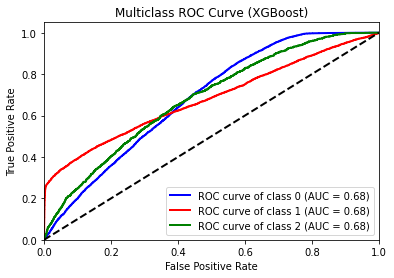

In [42]:
# generate the predicted class probabilities for the test set
y_pred_prob = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
lw = 2
colors = ['blue', 'red', 'green']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    
# Plot the chance line (diagonal)
plt.plot([0, 1], [0, 1], 'k--', lw=lw)

# Set the limits of the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Set labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (XGBoost)')
plt.legend(loc="lower right")
plt.show()

PARTNER 1 - TRAINING EVALUATION - Random Forest

In [43]:
# initialize the random forest model
model_rfc = RandomForestClassifier(n_estimators=1000)

# fitting the model with the train data
model_rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_rfc.predict(X_test)

# change the array into a dataframe and rename its column to status_group
y_pred = pd.DataFrame(y_pred)
y_pred = pd.DataFrame(y_pred[0]).rename(columns={0: 'status_group'})

# verify that the column name has been changed
y_pred = y_pred.replace({'functional': 0, 'non functional': 1, 'functional needs repair': 2})

# Calculate evaluation metrics
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print("F1 score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print(accuracy)
print(classification_report(y_test, y_pred))

F1 score: 0.5650043875461941
Precision: 0.5461807253742299
Recall: 0.5858024691358025
0.5858024691358025
              precision    recall  f1-score   support

           0       0.64      0.67      0.66      9724
           1       0.51      0.58      0.54      6803
           2       0.00      0.00      0.00      1293

    accuracy                           0.59     17820
   macro avg       0.38      0.42      0.40     17820
weighted avg       0.55      0.59      0.57     17820



c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precisio

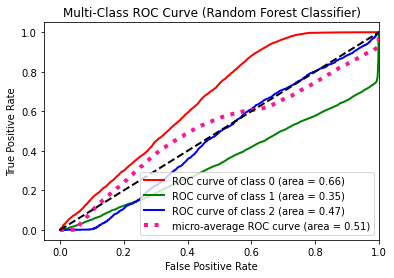

In [44]:
from sklearn.preprocessing import label_binarize

y_score = model_rfc.predict_proba(X_test)

# binarize the labels and predictions
n_classes = 3 # assuming there are 3 classes
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score_bin = y_score

# compute the ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_score_bin.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# plot the ROC curves for each class
plt.figure()
lw = 2
colors = ['red', 'green', 'blue'] # assuming there are 3 classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

# plot the micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle=':',
         label='micro-average ROC curve (area = {0:0.2f})'
         ''.format(roc_auc_micro), linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve (Random Forest Classifier)')
plt.legend(loc="lower right")
plt.show()

Partner 1 - Testing Evaluation

In [45]:
# read the cleaned training dataset
train = pd.read_csv('clean.csv')
# read the cleaned testing dataset
test = pd.read_csv('test_clean.csv')
# set the target variable to the status_group column
target=train.pop('status_group')

# creating a new column in both training and testing dataset with a binary value
# 1 = training data, 0 = testing data
train['train']=1
test['train']=0

# combine both training and testing dataset
combined = pd.concat([train, test])

# changing the categorical features values into numerical using one hot encoding
combined['funder'] = pd.factorize(combined['funder'])[0]
combined['scheme_management'] = pd.factorize(combined['scheme_management'])[0]
combined['extraction_type'] = pd.factorize(combined['extraction_type'])[0]
combined['management'] = pd.factorize(combined['management'])[0]
combined['payment_type'] = pd.factorize(combined['payment_type'])[0]
combined['water_quality'] = pd.factorize(combined['water_quality'])[0]
combined['quantity'] = pd.factorize(combined['quantity'])[0]
combined['source'] = pd.factorize(combined['source'])[0]
combined['waterpoint_type'] = pd.factorize(combined['waterpoint_type'])[0]
combined['basin'] = pd.factorize(combined['basin'])[0]
combined['region'] = pd.factorize(combined['region'])[0]
combined['lga'] = pd.factorize(combined['lga'])[0]
combined['district_code'] = pd.factorize(combined['district_code'])[0]
combined['operational_year'] = pd.factorize(combined['operational_year'])[0]
combined['installer'] = pd.factorize(combined['installer'])[0]

# distinguish and assign records with the previous 
# training or testing labels to their own dataframes
train_df = combined[combined["train"] == 1]
test_df = combined[combined["train"] == 0]
# drop that label as well as id
train_df.drop(["train"], axis=1, inplace=True)
train_df.drop(['id'],axis=1, inplace=True)
test_df.drop(["train"], axis=1, inplace=True)

C:\Users\micha\AppData\Local\Temp\ipykernel_16656\973510676.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(["train"], axis=1, inplace=True)
C:\Users\micha\AppData\Local\Temp\ipykernel_16656\973510676.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(['id'],axis=1, inplace=True)
C:\Users\micha\AppData\Local\Temp\ipykernel_16656\973510676.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.dr

Partner 1 - Testing Evaluation - XGBOOST

In [46]:
#define X train
X = train_df
#y_train indentified at the beginning 
y = target


# initialize the XGB model
model = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', nrounds = 'min.error.idx', 
                      num_class = 4, maximize = False, eval_metric = 'merror', eta = .2,
                      max_depth = 14, colsample_bytree = .4)

# changing the categorical test variable values into numerical using one hot encoding
y_ohe = y.replace({'functional': 0, 'non functional': 1, 'functional needs repair': 2})

# obtain the model's cross validation accuracy
scores = cross_val_score(model, X, y_ohe, cv=5, scoring='accuracy')
print(f'Accuracy: {np.mean(scores)} (std: {np.std(scores)})')

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python310\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "c:\Python310\lib\site-packages\xgboost\sklearn.py", line 1497, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
  File "c:\Python310\lib\site-packages\xgboost\sklearn.py", line 448, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
  File "c:\Python310\lib\site-packages\xgboost\sklearn.py", line 934, in _create_dmatrix
    return DMatrix(**kwargs, nthread=self.n_jobs)
  File "c:\Python310\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "c:\Python310\lib\site-packages\xgboost\core.py", line 743, in __init__
    handle, feature_names, feature_types = dispatch_data_backend(
  File "c:\Python310\lib\site-packages\xgboost\data.py", line 957, in dispatch_data_backend
    return _from_pandas_df(data, enable_categorical, missing, threads,
  File "c:\Python310\lib\site-packages\xgboost\data.py", line 404, in _from_pandas_df
    data, feature_names, feature_types = _transform_pandas_df(
  File "c:\Python310\lib\site-packages\xgboost\data.py", line 378, in _transform_pandas_df
    _invalid_dataframe_dtype(data)
  File "c:\Python310\lib\site-packages\xgboost\data.py", line 270, in _invalid_dataframe_dtype
    raise ValueError(msg)
ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:quantity_group: object


In [ ]:
test_processed = test
# changing the categorical features values into numerical using one hot encoding
test_processed['funder'] = pd.factorize(test_processed['funder'])[0]
test_processed['scheme_management'] = pd.factorize(test_processed['scheme_management'])[0]
test_processed['extraction_type'] = pd.factorize(test_processed['extraction_type'])[0]
test_processed['management'] = pd.factorize(test_processed['management'])[0]
test_processed['payment_type'] = pd.factorize(test_processed['payment_type'])[0]
test_processed['water_quality'] = pd.factorize(test_processed['water_quality'])[0]
test_processed['quantity'] = pd.factorize(test_processed['quantity'])[0]
test_processed['source'] = pd.factorize(test_processed['source'])[0]
test_processed['waterpoint_type'] = pd.factorize(test_processed['waterpoint_type'])[0]
test_processed['basin'] = pd.factorize(test_processed['basin'])[0]
test_processed['region'] = pd.factorize(test_processed['region'])[0]
test_processed['lga'] = pd.factorize(test_processed['lga'])[0]
test_processed['district_code'] = pd.factorize(test_processed['district_code'])[0]
test_processed['operational_year'] = pd.factorize(test_processed['operational_year'])[0]
test_processed['installer'] = pd.factorize(test_processed['installer'])[0]

test_processed = test_processed.drop(['id','train'],axis=1)

# Fit the classifier to the training data
model.fit(X, y_ohe)

# Make predictions on the test set
test_pred = model.predict(test_processed)

# read a csv containing the submussion format
test_result = pd.read_csv('SubmissionFormat.csv')
test_result['status_group'] = pd.DataFrame(test_pred)

# Create a dictionary to map integer values to string classes
class_dict = {0: 'functional', 1: 'non functional', 2: 'functional needs repair'}

# Replace the values in the 'status_group' column using the dictionary
test_result['status_group'] = test_result['status_group'].replace(class_dict)

# export it to csv
test_result.to_csv('submissionXG.csv', index=False)


Partner 1 - Testing Evaluation - Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# initialize the RFC model
model_rfc = RandomForestClassifier(n_estimators=1000)

# obtain cross_val_scores for 3 folds
cross_val_score(model_rfc, X, y, cv=3)

# fit the model
model_rfc.fit(X,y)

#ranking of features-
#longitude,latitude,gps_height,ward,funder,operational_year,population,
importances = model_rfc.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

for f in range(X.shape[1]):
    print(X.columns[indices[f]],end=', ')


In [ ]:
# set X_test to the test_df obtained earlier
X_test=test_df

# use model to make predictions
y_pred = model_rfc.predict(X_test)

# create a submission dataframe to submit to datadriven.org to check its accuracy
rfc_submission = pd.read_csv('SubmissionFormat.csv')
rfc_submission['status_group'] = pd.DataFrame(y_pred)

# export the dataframe to a csv file
rfc_submission.to_csv("submission_rfc.csv", index=False)


PARTNER 2 - CALVIN SCORPIANO HALIM

PARTNER 2 - FEATURE SELECTION

In [ ]:
#read csv and combine the training set values and labels

train_value = pd.read_csv('training_set_values.csv')
train_label = pd.read_csv('training_set_labels.csv')
df = pd.merge(train_value, train_label, on='id')

NameError: name 'pd' is not defined

In [ ]:
#remove redundant feature
#some feature have the same information like 'payment' and 'payment_type' so only keep one
df.drop(columns=['lga','ward', 'funder', 'installer', 'basin','permit','public_meeting','wpt_name','num_private','subvillage','region_code','recorded_by','scheme_name','payment_type','quantity_group','waterpoint_type_group','quality_group','source_type', 'source_class','management_group', 'extraction_type_group', 'extraction_type_class'], axis=1, inplace=True)

In [ ]:
#replace 0 with NaN value and impute them
df['construction_year'].replace(0.0, np.nan, inplace=True)
df["construction_year"].fillna(df.groupby(['region', 'district_code'])["construction_year"].transform("median"), inplace=True)
df["construction_year"].fillna(df.groupby(['region'])["construction_year"].transform("median"), inplace=True)
df["construction_year"].fillna(df.groupby(['district_code'])["construction_year"].transform("median"), inplace=True)
df["construction_year"].fillna(df["construction_year"].median(), inplace=True)

df['date_recorded'] = pd.to_datetime(df['date_recorded'])
df['operational_year'] = df.date_recorded.dt.year - df.construction_year
df.drop('date_recorded', axis=1, inplace=True)

In [ ]:
df.drop(columns=['region','construction_year','scheme_management'], axis=1, inplace=True)

In [ ]:
num_nan_per_column = df.isna().sum()

# Sort columns by number of NaN values (descending order)
sorted_columns = num_nan_per_column.sort_values(ascending=False)

# Print the columns with the most NaN values
print("Columns with the most NaN values:")
print(sorted_columns.head())

In [ ]:
num_zeros = (df['longitude'] == 0).sum()
mean_longitude = np.mean(df.loc[df['longitude'] != 0.0, 'longitude'])
# Replace any 0 longitude values with the mean
df.loc[df['longitude'] == 0.0, 'longitude'] = mean_longitude

In [ ]:
#encode categorical value with numerical value for the feature selection
cat_cols = ['extraction_type', 'management', 'payment', 'water_quality', 'quantity', 'source', 'waterpoint_type'] 
encoder = LabelEncoder()
df_encoded = df.copy()
for i in cat_cols:
    df_encoded[i] = encoder.fit_transform(df_encoded[i])


In [ ]:
#Feature selection using Mutual info classifier feature selection approach

# Separate the target variable from the predictor variables
X = df_encoded.drop('status_group', axis=1)
y = df_encoded['status_group']

# Perform Mutual Information feature selection
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

# Get the feature importance scores and create a new DataFrame
mi_scores = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_scores = mi_scores.sort_values('MI Score', ascending=False)

# Print the top 10 features with the highest MI score
print(mi_scores.head(10))

In [ ]:
data = df_encoded.loc[:,['id', 'quantity' ,'extraction_type','waterpoint_type', 'longitude','latitude','operational_year','payment','amount_tsh','water_quality','management','status_group']]

PARTNER 2 - MODEL TRAINING - LOGISTIC REGRESSION

In [ ]:

# split the data into features (X) and target (y)
X = data.drop('status_group', axis=1)
y = data['status_group']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create the logistic regression classifier
lr_clf = LogisticRegression()

# define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# create the GridSearchCV object
lr_grid = GridSearchCV(estimator=lr_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# fit the GridSearchCV object to the training data
lr_grid.fit(X_train, y_train)

# get the best parameters and retrain the model
best_params = lr_grid.best_params_
lr_best = LogisticRegression(**best_params)
lr_best.fit(X_train, y_train)

#feature importance
feature_importances = lr_best.coef_[0]
sorted_importances = sorted(zip(feature_importances, X_train.columns), reverse=True)
for importance_value, feature_name in sorted_importances:
    print(f"{feature_name}: {importance_value}")


# make predictions on the test set
y_pred = lr_best.predict(X_test)

# evaluate the model's performance
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# pickle the trained model
filename = 'lr_model.pkl'
pickle.dump(lr_best, open(filename, 'wb'))

f1_lr = f1_score(y_test, y_pred, average='weighted')
recall_lr = recall_score(y_test, y_pred, average='weighted')
print(f1_lr)
print(recall_lr)

PARTNER 2 - MODEL TRAINING - GRADIENT BOOSTING

In [ ]:
# Creating the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier()

# Creating the parameter grid to be searched by GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 5, 7]
}

# Creating the GridSearchCV object
gb_grid = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fitting the GridSearchCV object to the training data
gb_grid.fit(X_train, y_train)

print("Best parameters: ", gb_grid.best_params_)
print("Best score: ", gb_grid.best_score_)

# Saving the best model using pickle
pickle.dump(gb_grid.best_estimator_, open('GB.pkl', 'wb'))


# Making predictions using the best model
y_pred = gb_grid.predict(X_test)

# Printing the classification report and accuracy score
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

f1_gb = f1_score(y_test, y_pred, average='weighted')
recall_gb = recall_score(y_test, y_pred, average='weighted')
print(f1_gb)
print(recall_gb)

feature_importances = gb_grid.best_estimator_.feature_importances_
sorted_importances = sorted(zip(feature_importances, X_train.columns), reverse=True)
for importance_value, feature_name in sorted_importances:
    print(f"{feature_name}: {importance_value}")

PARTNER 2 - TESTING EVALUATION

In [ ]:
df = pd.read_csv('test_set_values.csv')
df.drop(columns=['lga','ward', 'funder', 'installer', 'basin','permit','public_meeting','wpt_name','num_private','subvillage','region_code','recorded_by','scheme_name','payment_type','quantity_group','waterpoint_type_group','quality_group','source_type', 'source_class','management_group', 'extraction_type_group', 'extraction_type_class'], axis=1, inplace=True)

df['construction_year'].replace(0.0, np.nan, inplace=True)
df["construction_year"].fillna(df.groupby(['region', 'district_code'])["construction_year"].transform("median"), inplace=True)
df["construction_year"].fillna(df.groupby(['region'])["construction_year"].transform("median"), inplace=True)
df["construction_year"].fillna(df.groupby(['district_code'])["construction_year"].transform("median"), inplace=True)
df["construction_year"].fillna(df["construction_year"].median(), inplace=True)

df['date_recorded'] = pd.to_datetime(df['date_recorded'])
df['operational_year'] = df.date_recorded.dt.year - df.construction_year

df.drop('date_recorded', axis=1, inplace=True)

num_nan_per_column = df.isna().sum()

# Sort columns by number of NaN values (descending order)
sorted_columns = num_nan_per_column.sort_values(ascending=False)

# Print the columns with the most NaN values

#delete the waste feature that does not have any 
df.drop(columns=['region','construction_year','scheme_management'], axis=1, inplace=True)

num_zeros = (df['longitude'] == 0).sum()
mean_longitude = np.mean(df.loc[df['longitude'] != 0.0, 'longitude'])
# Replace any 0 longitude values with the mean
df.loc[df['longitude'] == 0.0, 'longitude'] = mean_longitude

In [ ]:
cat_cols = ['extraction_type', 'management', 'payment', 'water_quality', 'quantity', 'source', 'waterpoint_type'] 
encoder = LabelEncoder()
df_encoded = df.copy()
for i in cat_cols:
    df_encoded[i] = encoder.fit_transform(df_encoded[i])


In [ ]:
test_df = df_encoded.loc[:,['id', 'quantity' ,'extraction_type','waterpoint_type', 'longitude','latitude','operational_year','payment','amount_tsh','water_quality','management']]

PARTNER 2 - TESTING EVALUATION - GRADIENT BOOSTING

In [ ]:
with open('GB.pkl', 'rb') as f:
    gb_best = pickle.load(f)
y_pred_gb = gb_best.predict(test_df)

In [ ]:
test_result_gb = pd.read_csv('SubmissionFormat.csv')
test_result_gb['status_group'] = pd.DataFrame(y_pred_gb)
test_result_gb.to_csv('final_gb.csv',index=False)

PARTNER 2 - TESTING EVALUATION - LOGISTIC REGRESSION

In [ ]:
with open('lr_model.pkl', 'rb') as f:
    lr_best = pickle.load(f)

lr_pred = lr_best.predict(test_df)

In [ ]:
test_result_lr = pd.read_csv('SubmissionFormat.csv')
test_result_lr['status_group'] = pd.DataFrame(lr_pred)

test_result_lr.to_csv('final_lr.csv',index=False)